# Исследование объявлений о продаже квартир

К анализу поступили данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Цель исследования**: установить параметры, влияющие на рыночную стоимость объектов недвижимости. 




**План исследования:**
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных: оценка влияния имеющихся параметров на стоимость объекта
 4. Итоговый вывод


### 1. Обзор данных

In [1]:
#импортируем библиотеку pandas для работы с табличными данными
import pandas as pd 

#импортируем библиотеку matplotlib для работы с графиками
import matplotlib.pyplot as plt

In [2]:
# считываем таблицу и сохраняем ее в переменную data
data = pd.read_csv('real_estate_data.csv', sep='\t') 

# выведем первые 20 строк датафрейма, чтобы первично ознакомиться с данными
data.head(20) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() # изучим общую информацию о нашем датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

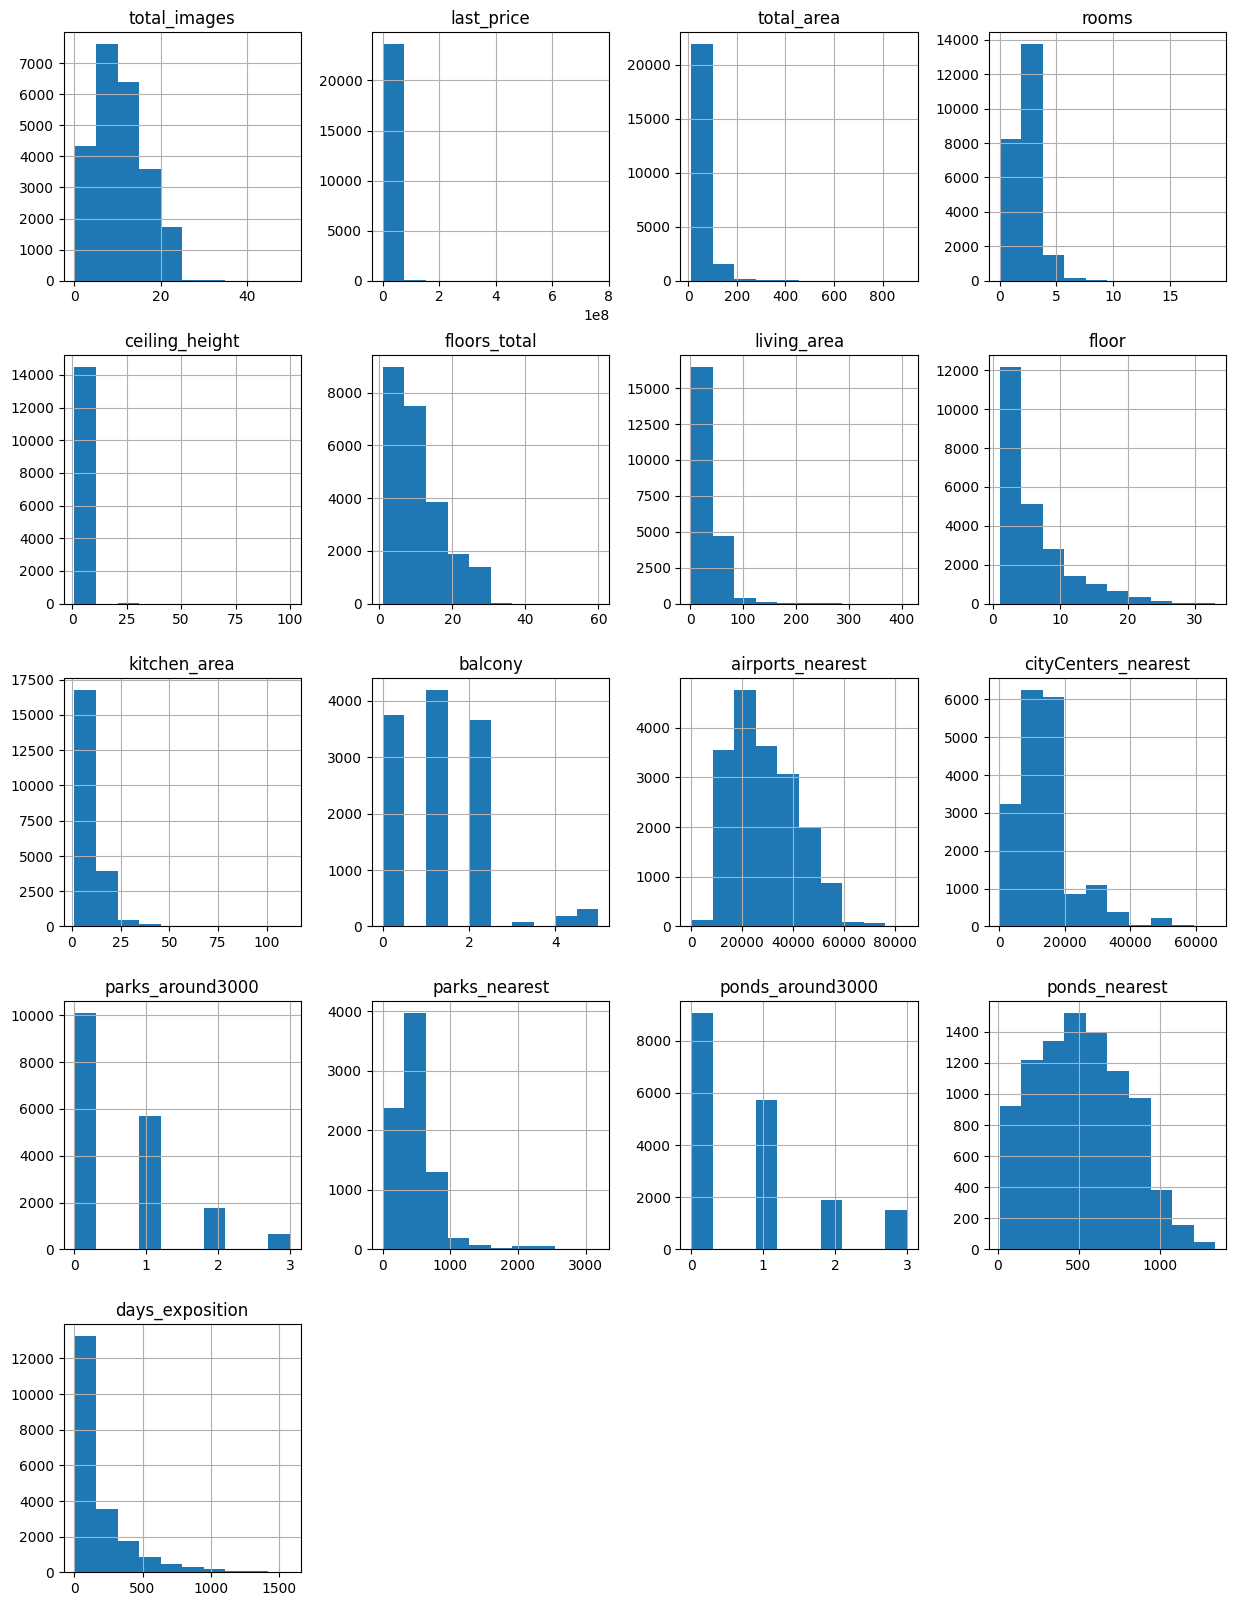

In [4]:
data.hist(figsize=(15, 20)) # построим гистограммы для всех числовых значений датафрейма, чтобы посмотреть,
# какова частотность этих величин
plt.show()

**Вывод:**

Мы первично ознакомились с данными, использовав метод *info* и построив гистрограммы для всех столбцов с числовыми величинами. Увидели, какого рода информация хранится в таблице, какие типы данных использованы, какова частотность значений, представленных в разных столбцах. Все это пригодится нам в процессе предобработки и анализа.

### 2. Предобработка данных

#### 2.1 Обработка пропущенных значений

In [5]:
data.isna().sum() # посмотрим, есть ли в таблице пропущенные значения и сколько их в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Наибольшее количество пропусков наблюдается в столбце **is_apartment**. Более 20 тысяч строк. Это около 88% от общего объема данных. 

Если принадлежность к апартаментам/ не апартаментам не указана, значит, пропуски могут быть заполнены значением False:

In [6]:
data['is_apartment']=data['is_apartment'].astype(bool).fillna(False) # меняем тип данных в столбце на bool 
#и заменяем пустые значения в столбце is_apartment на False

Наименьшее количество пропусков в столбцах **floors_total** и **locality_name** - суммарно не превышает 150. Их мы можем удалить. Влияние на результаты исследования несущественно.

In [7]:
data = data.dropna(subset=['floors_total','locality_name']).reset_index(drop=True) # удаляем строки с пропусками 
#в столбцах с количеством этажей в доме и с названиями населенных пунктов

Посмотрим на пропуски, которые точно можно заменить на конкретные значения: в столбце **balcony** отсутствие информации скорее всего означает отстутствие балкона в квартире. Заменим пустые ячейки в этом столбце на 0:

In [8]:
data['balcony']=data['balcony'].fillna(0)

То же самое можно сделать со столбцами с информацией о количестве ближайших парков и водоемов (**ponds_around3000** и **parks_around3000**). Если данные отсутствуют, значит вблизи (3 км, согласно условия) парков и водоемов нет.

In [9]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) # заполняем пропуски в столбцах с информацией
# о количестве парков в радиусе 3 км

data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # заполняем пропуски в столбцах с информацией
# о количестве водоемов в радиусе 3 км

Логично, что если вблизи (3 км) парков или водоемов нет, то данных об удаленности этих объектов тоже быть не должно. Взглянем на гистограммы, построенные по значениям столбцов **parks_nearest** и **pond_nearest**: действительно, максимальное расстояние до ближайших парков и водоемов не превышает 3000 м. Значит заполнить пропуски нам нечем. Оставим все как есть и будем считать приоритетным наличие и количество ближайших парков и водоемов, а не их удаленность.

Без изменения также оставим столбцы **cityCenters_nearest**, **airports_nearest** и **days_exposition**. Данных для заполнения у нас нет, а заполнение нулевыми или медианными значениями грозит искажением результатов исследования.

Теперь посмотрим на столбцы, содержащие данные о площади помещений: **living_area, kitchen_area**.

Заполнить пропуски в этих значениях нулевыми или медианными мы не можем - снова велик риск искажения. 

Нам известна общая площадь каждой квартиры. Попробуем использовать эту информацию, для заполнения пропусков. 

Для начала проверим для всех ли строк выполняется соотношение **living_area**+**kitchen_area**<**total_area**:

In [10]:
data.loc[(data['living_area']+data['kitchen_area'])>=data['total_area'], 'total_area'].count()

134

In [11]:
# отсеим строки, в которых соотношение не соблюдается
data = data.loc[~((data['living_area']+data['kitchen_area'])>=data['total_area'])] 

Расчитаем долю площадей кухни и жилой площади от общей площади.

In [12]:
data['living_rate']=data['living_area']/data['total_area'] # получим новый столбец с соотношением жилой площади
# к площади квартиры

data['kitchen_rate']=data['kitchen_area']/data['total_area'] # получим новый столбец с соотношением площади кухни
# к площади квартиры

Посчитаем медианное соотношение площадей и запишем данные в сводную таблицу: 

In [13]:
df = data.pivot_table(index='rooms', values=['living_rate', 'kitchen_rate'], aggfunc='median').median() 
df

kitchen_rate    0.102089
living_rate     0.659741
dtype: float64

Заполним пропуски получившимися значениями:

In [14]:
data.loc[data['living_area'].isna(), 'living_area'] =df['living_rate'] * data['total_area']

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] =df['kitchen_rate'] * data['total_area']

Нерассмотренным остался один столбец - **ceiling_height**. У нас нет точных данных о том, что влияет на высоту потолков, поэтому просто заполним пропуски в этом столбце медианным значением:

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Сделаем итоговую проверку по всем столбцам:

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5476
cityCenters_nearest      5453
parks_around3000            0
parks_nearest           15442
ponds_around3000            0
ponds_nearest           14428
days_exposition          3154
living_rate              1865
kitchen_rate             2222
dtype: int64

Незаполненными остались столбцы **airports_nearest**, **cityCenters_nearest**, **parks_nearest**, **ponds_nearest**, **days_exposition** - в них мы оставили пропуски намеренно, и столбцы **living_rate** и **kitchen_rate** - они остались без изменения, так как в дальнейшем нам не понадобятся.

####  2.2 Изменение типов данных

Еще раз посмотрим на тип данных, приведенных в таблице:

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23431 entries, 0 to 23564
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23431 non-null  int64  
 1   last_price            23431 non-null  float64
 2   total_area            23431 non-null  float64
 3   first_day_exposition  23431 non-null  object 
 4   rooms                 23431 non-null  int64  
 5   ceiling_height        23431 non-null  float64
 6   floors_total          23431 non-null  float64
 7   living_area           23431 non-null  float64
 8   floor                 23431 non-null  int64  
 9   is_apartment          23431 non-null  bool   
 10  studio                23431 non-null  bool   
 11  open_plan             23431 non-null  bool   
 12  kitchen_area          23431 non-null  float64
 13  balcony               23431 non-null  float64
 14  locality_name         23431 non-null  object 
 15  airports_nearest      17

В дате публикации объявления о продаже указан тип данных *object*. Переобразуем строку в формат datetime:

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
data.head(5) # посмотрим как изменились значения в таблице 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_rate,kitchen_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,104.898849,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


Далее преобразуем в целочисленные значения количественные данные: **floors_total** (общее кол-во этажей), **balcony** (кол-во балконов), **parks_around3000** (кол-во парков вблизи), **ponds_around3000** (кол-во водоемов вблизи):

In [20]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

После преобразования типы данных в таблице будут следующими:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23431 entries, 0 to 23564
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23431 non-null  int64         
 1   last_price            23431 non-null  float64       
 2   total_area            23431 non-null  float64       
 3   first_day_exposition  23431 non-null  datetime64[ns]
 4   rooms                 23431 non-null  int64         
 5   ceiling_height        23431 non-null  float64       
 6   floors_total          23431 non-null  int64         
 7   living_area           23431 non-null  float64       
 8   floor                 23431 non-null  int64         
 9   is_apartment          23431 non-null  bool          
 10  studio                23431 non-null  bool          
 11  open_plan             23431 non-null  bool          
 12  kitchen_area          23431 non-null  float64       
 13  balcony              

#### 2.3 Обработка дубликатов и аномальных значений

Посчитаем, сколько дублирующихся значений присутствует в таблице:

In [22]:
data.duplicated().sum() 

0

Явных дубликатов в данных обнаружить не удалось. Посмотрим, как обстоят дела с неявными: изучим уникальные значения в столбце со строчным типом данных - название населенного пункта

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Как видно, в столбце помимо самого названия присутствует также тип населенного пункта (поселок, деревня, городской поселок и т.д.). Очевидно, что вид населенного пункта может быть указан различными способами. Также, может различаться написание самого названия населенного пункта (например, е вместо ё). 

In [24]:
# избавимся сначала от буквы Ё в наименованиях
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [25]:
# с помощью дробления на два разных столбца (тип поселения и наименование), приведем имена населенных пунктов
# к единообразию и избавимся от неявных дубликатов
data[['locality_type', 'new_locality_name']] = data['locality_name'].str.split(pat='(?=[A-Я])', n=1, expand=True)

Снова выведем уникальные значения для столбца с наименованием населенных пунктов. Теперь эта информация содержится в новом столбце **new_locality_name**.

In [26]:
data['new_locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

Преобразование проведено успешно.

**Вывод:**

В ходе предварительной обработки данных в исходном массиве данных было обнаружено огромное число пропусков. Так, например в столбце с **is_apartment** 88% пропусков. Их было решено заполнить с помощью False.

Пропуски в некоторых других столбцах были заполнены нулями или были удалены.

Незаполненными остались столбцы **airports_nearest**, **cityCenters_nearest**, **parks_nearest**, **ponds_nearest**, **days_exposition** - в них мы оставили пропуски намеренно,так как заполнение могло привести к искажению результатов исследования.

Для удобства дальнейшего анализа, столбец с датой публикации объявления о продаже был преобразован в тип datetime.
Количественные данные об общем количестве этажей, балконов, парков и водоемов поблизости были преобразованы в целочисленный тип данных int. 
Еще 3 булевых значения, 1 значение типа object(строка) и 10 чисел с плавающей точкой (float) остались без изменения - указанные типы данных применимы для описания информации в соответствующих столбцах.

Проверка данных на наличие дубликатов показала, что явных дубликатов в таблице нет, однако есть неявные, содержащиеся в столбце с наименованиями населенных пунктов. Вопрос с избавлением от неявных дубликатов был решен путем отделения типа населенного пункта от его названия и разделения столбца **locality_name** на два новых: **locality_type**, **new_locality_name**.

### 3. Исследовательский анализ данных

Для дальнейшего анализа введем несколько дополнительных столбцов. 

In [27]:
# столбец с ценой за квадратный метр
data['meter_price'] = data['last_price']/data['total_area'].round(2)

# столбец с днем недели публикации объявления
data['day_publication'] = data['first_day_exposition'].dt.weekday

# столбец с месяцем публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month

# столбец с годом публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year

# столбец с типом этажа (первый, последний, другой)
data['floor_type'] = 'другой'
data.loc[data['floor']==1, 'floor_type'] = 'первый'
data.loc[data['floor']==data['floors_total'], 'floor_type'] = 'последний'

# столбец с расстоянием до центра города в километрах
data['city_nearest'] = (data['cityCenters_nearest']/1000).round(0)

Изучим более пристально имеющиеся у нас данные.

#### 3.1 Анализ основных параметров объектов

##### Общая площадь

Для начала построим гистограмму по данным из столбца **total_area**:

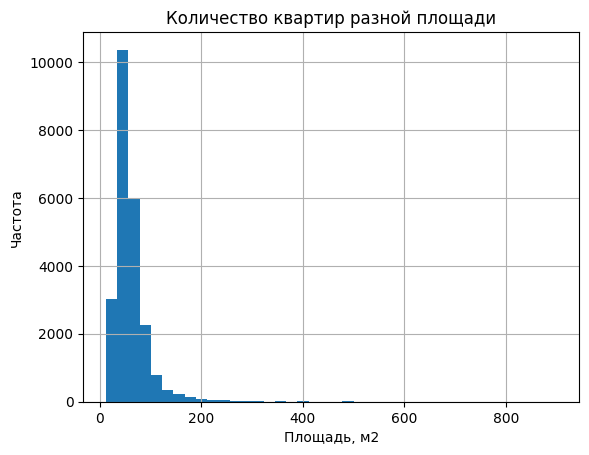

In [28]:
data['total_area'].hist(bins=40)
plt.title('Количество квартир разной площади')
plt.xlabel('Площадь, м2')
plt.ylabel('Частота')
plt.show()

Пик гистограммы пришелся на квартиры до 100 квадратных метров. Это логично, так как жилье свыше этого метража более дорогостоящее и считается элитным - такого жилья меньшинство. Видно также, что около 1,5 тысяч квартир имеют более обширную площадь - от 100 до 200 квадратных метров. Максимальное значение и вовсе превышает 800 квадратных метров. Посчитаем, как велико количество квартир класса премиум:

In [29]:
data.loc[data['total_area']>150, 'total_area'].count()

560

Относительно общего размера выборки, значение невелико. Так как наша цель провести анализ типовой недвижимости, избавимся от строк с такими величинами площади, как от строк с выбросами:

In [30]:
data = data.loc[data['total_area']<150]

##### Жилая площадь

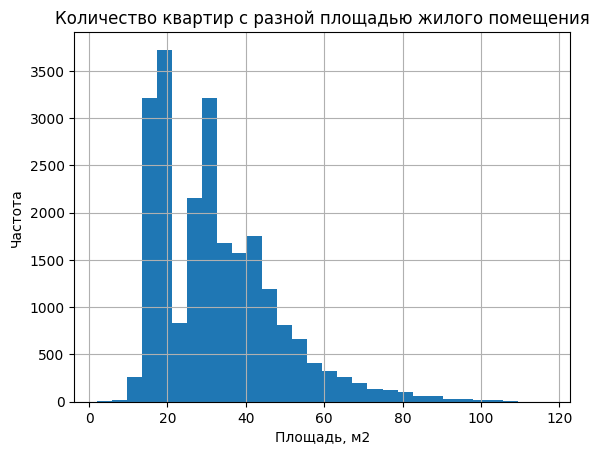

In [31]:
data.hist('living_area', bins=30)
plt.title('Количество квартир с разной площадью жилого помещения')
plt.xlabel('Площадь, м2')
plt.ylabel('Частота')
plt.show()

Пик гистограммы по данным о жилой площади приходится на 20 квадратных метров. Довольно частыми являются площади до 60 квадратных метров. Есть выброс в виде очень маленьких площадей, близких к нулю:

In [32]:
data.loc[data['living_area']<4, 'living_area'].count() # посчитали количество квартир с жилой площадью меньше 4
# квадратных метров

4

Удалим строки с подозрительно маленькой жилой площадью:

In [33]:
data = data.loc[data['living_area']>4]

Теперь посмотрим на строчки с большими жилыми площадьми:

In [34]:
data.query('living_area>100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_rate,kitchen_rate,locality_type,new_locality_name,meter_price,day_publication,month_publication,year_publication,floor_type,city_nearest
35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,True,...,0.697987,0.114094,,Санкт-Петербург,104026.845638,0,6,2017,другой,4.0
700,8,10600000.0,141.0,2015-12-17,4,2.90,5,107.0,3,False,...,0.758865,0.141844,,Санкт-Петербург,75177.304965,3,12,2015,другой,4.0
886,3,17000000.0,149.2,2017-12-19,5,3.00,6,104.2,1,True,...,0.698391,0.119303,,Санкт-Петербург,113941.018767,1,12,2017,первый,2.0
1771,20,22900000.0,149.0,2018-10-15,5,3.00,7,107.0,6,True,...,0.718121,0.054362,,Санкт-Петербург,153691.275168,0,10,2018,другой,3.0
2118,8,7829000.0,147.8,2016-04-01,5,2.75,5,106.0,5,False,...,0.717185,0.085927,,Гатчина,52970.230041,4,4,2016,последний,NaN
2131,8,12590000.0,140.9,2019-04-12,6,3.00,5,104.1,3,True,...,0.738822,0.084457,,Санкт-Петербург,89354.151881,4,4,2019,другой,3.0
2577,15,22500000.0,148.0,2017-09-20,4,3.50,5,103.6,2,True,...,0.700000,0.135135,,Санкт-Петербург,152027.027027,2,9,2017,другой,6.0
4139,8,17500000.0,146.3,2017-11-08,7,3.30,4,108.0,3,True,...,0.738209,0.061517,,Санкт-Петербург,119617.224880,2,11,2017,другой,4.0
4604,1,39900000.0,132.0,2017-11-23,4,3.00,8,105.0,5,True,...,0.795455,0.181818,,Санкт-Петербург,302272.727273,3,11,2017,другой,5.0
4829,2,11500000.0,149.0,2015-01-21,5,3.25,5,102.0,5,False,...,0.684564,0.134228,,Санкт-Петербург,77181.208054,2,1,2015,последний,4.0


Все логично - большие жилые площади соответствуют большим квартирам. 

##### Площадь кухни

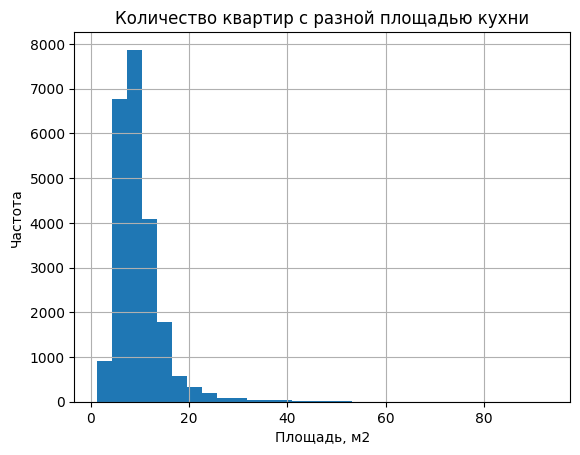

In [35]:
data.hist('kitchen_area', bins=30)
plt.title('Количество квартир с разной площадью кухни')
plt.xlabel('Площадь, м2')
plt.ylabel('Частота')
plt.show()

Пик гистограммы пришелся на небольшие кухни площадью до 10 квадртных метров. Достаточно много кухонь площадью до 20 квадратных метров. Есть экстремально высокие значения - свыше 30 квадратных метров. В нашей текущей выборке присутствуют довольно большие квартиры, однако кухня свыше 30 квадратных метров явно указывает на то, что жилье относится к сегменту элитного жилья. Для нашего исследования такие данные не подходят.

Посчитаем, как много в выборке выбивающихся значений:

In [36]:
data.loc[data['kitchen_area']>30, 'kitchen_area'].count() # считаем квартиры с площадью кухни свыше 30 
#квадратных метров

189

Выбросов не так много, можем удалить:

In [37]:
data = data.loc[data['kitchen_area']<30] # удаляем кухни свыше 30 квадратов

##### Цена объекта

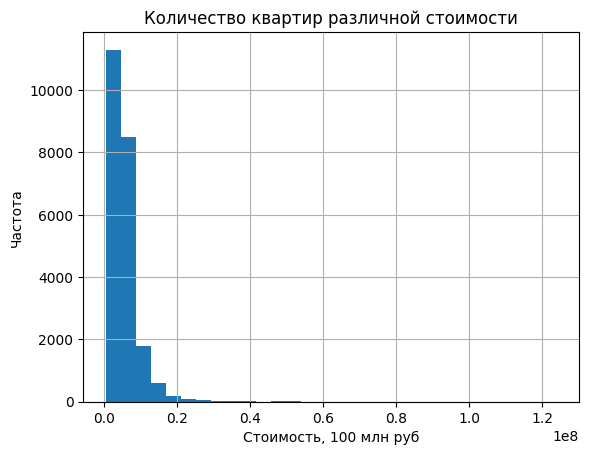

In [38]:
data.hist('last_price', bins = 30)
plt.title('Количество квартир различной стоимости')
plt.xlabel('Стоимость, 100 млн руб')
plt.ylabel('Частота')
plt.show()

Данные о цене объекта представлены на гистограмме в сотнях миллионов рублей. Наиболее часто в нашей выборке встречается цена квартиры до 15 миллионов рублей. Видимый участок гистограммы оканчивается на 40 миллионах рублей. Посмотрим, как много объектов имеют свыше этой суммы:

In [39]:
data.query('last_price>40000000')['last_price'].count() 

29

Довольно небольшое количество. Суммы свыше 40 миллионов аномально высокие для нашего исследования. Избавимся от них:

In [40]:
data = data.query('last_price<40000000')

По гистограмме выше заметно, что в выборке присутствует много квартир со стоимостью близкой к нулевой отметке. Сделаем срез данных по стоимости ниже 2 миллионов и построим гистограмму, чтобы изучить ситуацию с низкими ценами.

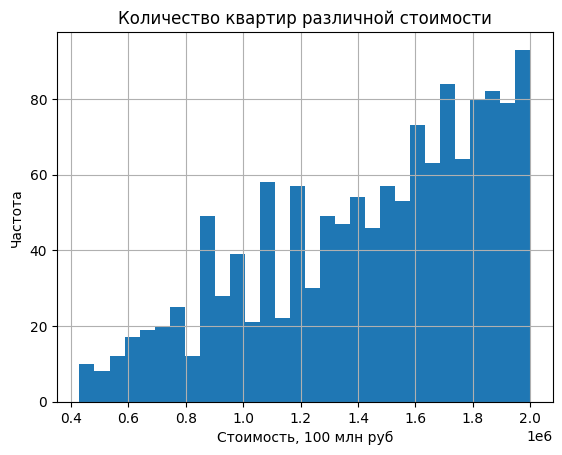

In [41]:
data.query('last_price<2000000')['last_price'].hist(bins=30)
plt.title('Количество квартир различной стоимости')
plt.xlabel('Стоимость, 100 млн руб')
plt.ylabel('Частота')
plt.show()

Стоимость в выбранном диапазоне сильно колеблется. Набюдаются аномально низкие значения - минимум по графику составляет 400 с лишним тысяч рублей. Посмотрим на то, в каких населенных пунктах встречается столь недорогое жилье.

In [42]:
#отсортируем данные по стоимости ниже 500 тысяч рублей и выведем список населенных пунктов
data.query('last_price<500000')['new_locality_name'].unique()

array(['Будогощь', 'Старополье', 'Сланцы', 'Свирь', 'Вахнова Кара',
       'Ям-Тесово', 'Совхозный'], dtype=object)

Низкая стоимость встречается в небольших населенных пунктах - в деревнях и селах. Потому можно сделать, что значения не аномальны, они имеют место быть. Однако для нашего исследования они также нерелевантны как , как нерелевантны большие стоимости элитного жилья. Посчитаем, как много у нас квартир со стоимостью ниже 1 миллиона рублей.

In [43]:
data.query('last_price<1000000')['last_price'].count()

219

Удалим эти строки.

In [44]:
data = data.query('last_price>1000000')

На основе очищенных данных, построим гистограмму еще раз:

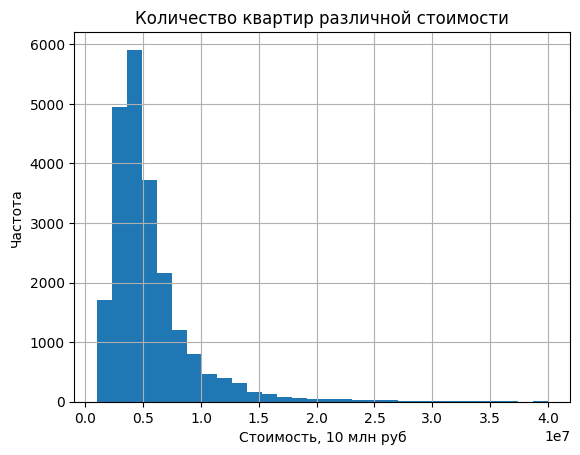

In [45]:
data.hist('last_price', bins=30)
plt.title('Количество квартир различной стоимости')
plt.xlabel('Стоимость, 10 млн руб')
plt.ylabel('Частота')
plt.show()

Теперь график стал более читаемым и детальным. Масштаб изменился, теперь сумма измеряется в десятках миллионов. 

##### Количество комнат

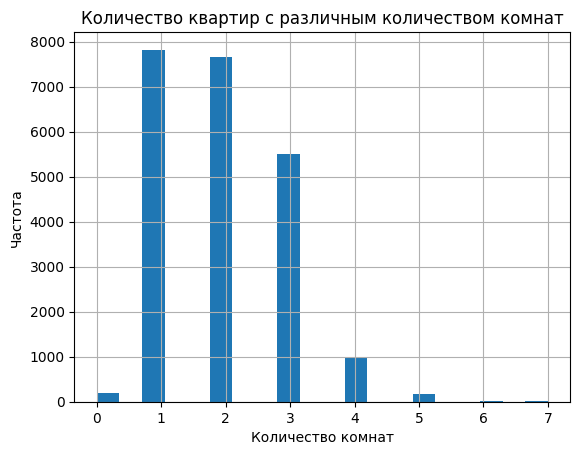

In [46]:
data.hist('rooms', bins=20)
plt.title('Количество квартир с различным количеством комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Большинство квартир в выборке 1-2-ух комнатные. По гистограмме видно, что есть отдельно стоящие значения в виде 6-7 комнат. Попробуем понять, действительно ли эти значения аномальные:

In [47]:
data.query('rooms>=6') # посмотрим на данные о квартирах с 6-7 комнатами 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_rate,kitchen_rate,locality_type,new_locality_name,meter_price,day_publication,month_publication,year_publication,floor_type,city_nearest
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.000000,2,True,...,0.691176,0.080882,,Санкт-Петербург,86727.941176,4,9,2017,последний,7.0
200,5,10880000.0,123.1,2015-11-12,6,3.20,5,89.000000,2,True,...,0.722989,0.089358,,Санкт-Петербург,88383.428107,3,11,2015,другой,3.0
851,18,15000000.0,134.0,2017-10-27,7,2.65,4,88.000000,3,True,...,0.656716,0.089552,,Санкт-Петербург,111940.298507,4,10,2017,другой,4.0
2010,1,9100000.0,111.0,2017-07-04,6,2.75,3,84.500000,3,True,...,0.761261,0.091892,,Санкт-Петербург,81981.981982,1,7,2017,последний,2.0
2131,8,12590000.0,140.9,2019-04-12,6,3.00,5,104.100000,3,True,...,0.738822,0.084457,,Санкт-Петербург,89354.151881,4,4,2019,другой,3.0
3300,20,16550000.0,96.0,2018-02-16,6,2.60,5,80.000000,3,True,...,0.833333,0.104167,,Санкт-Петербург,172395.833333,4,2,2018,другой,1.0
3310,1,9200000.0,138.0,2016-03-22,6,2.65,5,77.600000,2,True,...,0.562319,0.102174,,Санкт-Петербург,66666.666667,1,3,2016,другой,5.0
4139,8,17500000.0,146.3,2017-11-08,7,3.30,4,108.000000,3,True,...,0.738209,0.061517,,Санкт-Петербург,119617.224880,2,11,2017,другой,4.0
5228,15,6100000.0,87.0,2017-06-28,6,3.50,3,68.000000,2,True,...,0.781609,0.067816,,Пушкин,70114.942529,2,6,2017,другой,34.0
9809,13,12000000.0,106.0,2018-07-30,6,2.80,3,70.000000,1,True,...,0.660377,0.141509,,Санкт-Петербург,113207.547170,0,7,2018,первый,5.0


Таких квартир не очень много, но большинство из них соответствует жилью с площадью до 130 квадратных метров. Значит площади комнат не очень большие, заметной аномалии в этом нет.

##### Высота потолков

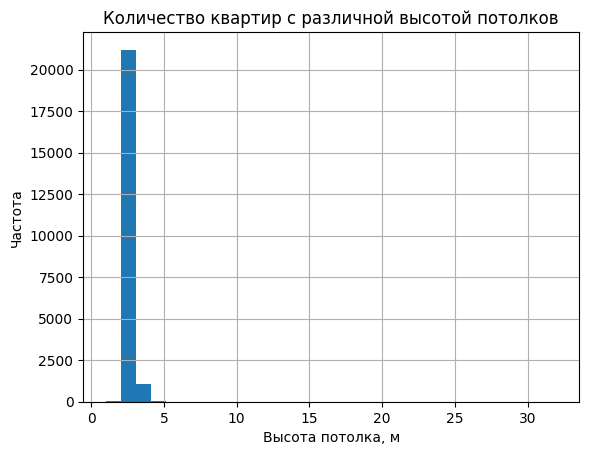

In [48]:
data.hist('ceiling_height', bins=30)
plt.title('Количество квартир c различной высотой потолков')
plt.xlabel('Высота потолка, м')
plt.ylabel('Частота')
plt.show()

Пик гистограммы приходится на высоту потолков до 5 метров. Однако есть явные выбросы - неестественно высокие значения от 5 до 30 метров и выше. 

In [49]:
data.query('ceiling_height>5') # посмотрим на данные о квартирах с высотой потолков выше 5 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_rate,kitchen_rate,locality_type,new_locality_name,meter_price,day_publication,month_publication,year_publication,floor_type,city_nearest
353,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.00000,2,False,...,0.579710,NaN,,Гатчина,65217.391304,3,7,2018,другой,NaN
3134,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.00000,2,True,...,0.706667,0.106667,,Волхов,38666.666667,0,11,2018,другой,NaN
3459,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.30000,2,False,...,0.510000,0.243333,деревня,Нурма,46666.666667,4,3,2018,другой,NaN
4621,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.00000,2,True,...,0.666667,0.155556,,Санкт-Петербург,95555.555556,3,2,2018,другой,13.0
4852,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.00000,17,True,...,0.680000,NaN,поселок,Мурино,120000.000000,2,9,2017,другой,NaN
5051,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.50000,1,True,...,0.639344,0.180328,,Санкт-Петербург,126229.508197,2,10,2018,первый,8.0
5219,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.00000,3,True,...,0.555556,0.166667,деревня,Мины,46296.296296,4,10,2017,другой,NaN
5641,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.30000,3,True,...,0.426000,0.140000,,Санкт-Петербург,88000.000000,1,8,2017,другой,11.0
5777,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.00000,13,True,...,0.512500,0.150000,,Санкт-Петербург,101875.000000,2,1,2019,другой,20.0
5833,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.30000,14,True,...,0.428889,0.184444,,Санкт-Петербург,125555.555556,2,8,2018,другой,11.0


Так как общее количество таких объектов не велико, удалим строки с аномальными значениями:

In [50]:
data = data.query('ceiling_height<5')

Посмотрим на гистограмму, построенную на основе очищенных от аномалий данных:

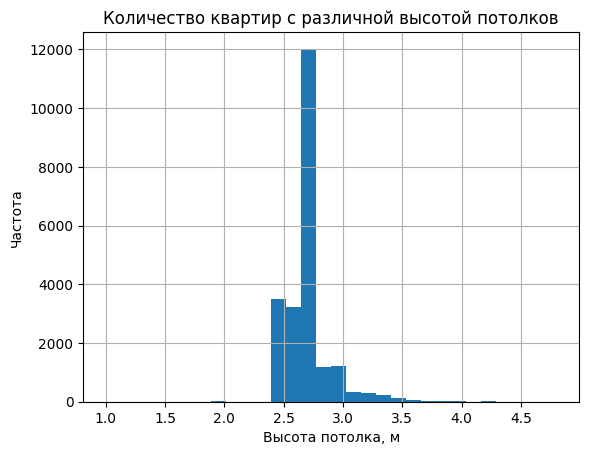

In [51]:
data.hist('ceiling_height', bins=30)
plt.title('Количество квартир c различной высотой потолков')
plt.xlabel('Высота потолка, м')
plt.ylabel('Частота')
plt.show()

Теперь заметно, что в выборке есть квартиры с экстремально низкими потолками. Тут явно, что-то не так. Избавимся от данных о квартирах с потолками ниже 2,5 метров:

In [52]:
data = data.loc[~(data['ceiling_height']<2.5)]

##### Тип этажа квартиры

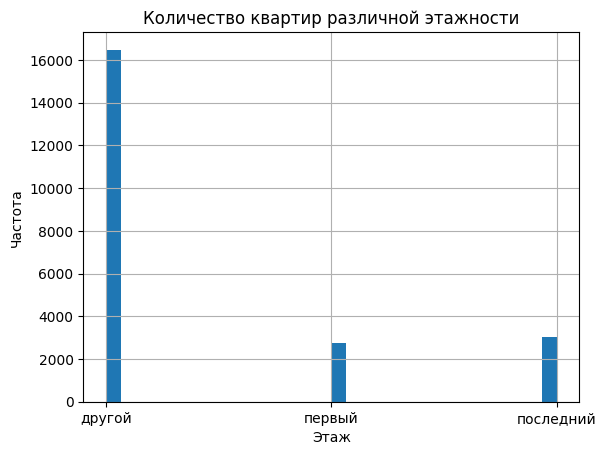

In [53]:
data['floor_type'].hist(bins=30)
plt.title('Количество квартир различной этажности')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.show()

Пик гистограммы приходится на тип этажа "другой". Здесь никаких аномалий не наблюдается. Категорий "первый", "последний" меньше, так как первых и последних этажей в каждом доме всего по одному.  

##### Общее количество этажей в доме

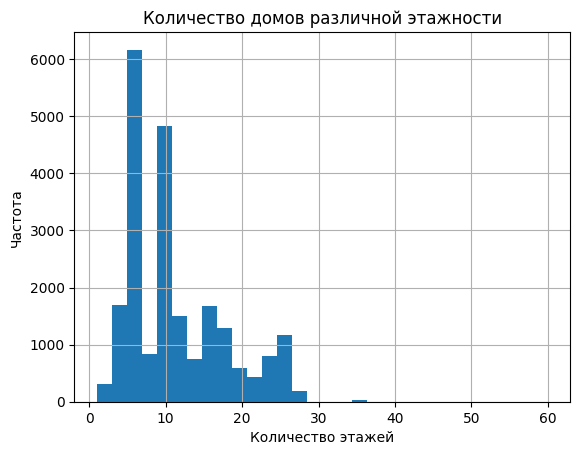

In [54]:
data['floors_total'].hist(bins=30)
plt.title('Количество домов различной этажности')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

Пик гистограммы приходится на дома с этажностью до 10 этажей. График показал наличие аномальных значений. Мы владеем данными о квартирах в Санкт-Петербурге и Ленинградской области. Самым высоким жилым домом в Санкт-Петербурге является жилое здание Князь Александр Невский высотой 37 этажей. В Лениградской области и вовсе нет такого высотного жилья. Здесь явно что-то не так. 

In [55]:
data.loc[data['floors_total']>37, 'floors_total'].count() # посмотрим как много выдающих значений

2

Квартир с этажностью свыше известной максимальной всего две. Можем удалить соответствующие строки:

In [56]:
data = data.loc[data['floors_total']<37] 

##### Расстояние до центра города в метрах

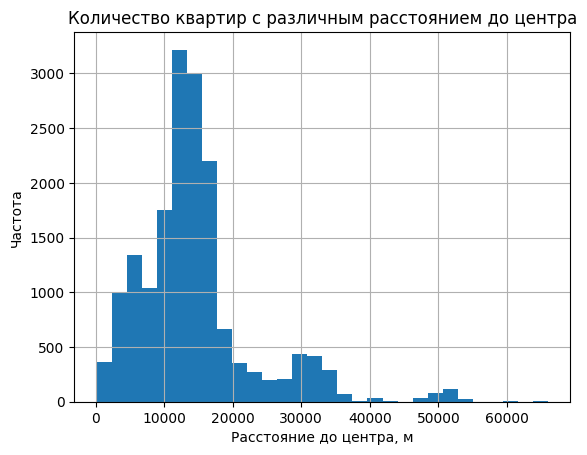

In [57]:
data.hist('cityCenters_nearest', bins=30)
plt.title('Количество квартир c различным расстоянием до центра')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Частота')
plt.show()

Большое количество квартир в нашей выборке удалены от центра не больше, чем на 20 тысяч метров. В целом по данному столбцу видится большой разброс. Ничего подозрительного здесь нет - объекты из нашей выборки имеют разное географическое положение.

##### Расстояние до ближайшего парка

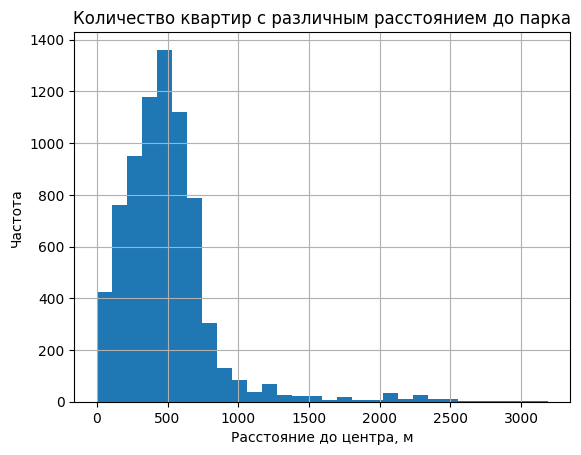

In [58]:
data.hist('parks_nearest', bins=30)
plt.title('Количество квартир c различным расстоянием до парка')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Частота')
plt.show()

Пик гистограммы приходится на расстояние в 500 метров до парка. Максимальное значение чуть выше 3000 метров, соответсвует признаку для опредения парка *ближайшим*.

##### Срок продажи квартиры

Изучим как быстро продавались квартиры. 

Для начала построим гистограмму по столбцу с данными о времени нахождения объявления на сайте.

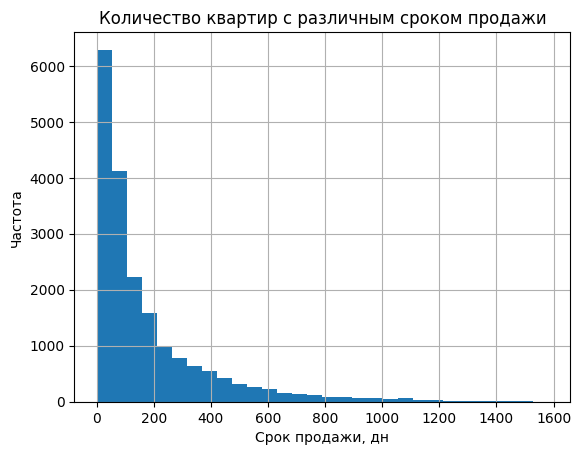

In [59]:
data.hist('days_exposition', bins=30)
plt.title('Количество квартир c различным сроком продажи')
plt.xlabel('Срок продажи, дн')
plt.ylabel('Частота')
plt.show()

Пик гистограммы приходится на значения близкие к нулю. Значит довольно большое количество квартир продается/ снимается с продажи за считанные дни. По графику наблюдается закономерность - чем больше срок продажи в днях, тем меньше частотность этого значения.

Для еще более детального описания времени продажи квартир посчитаем среднее и медианное значения времени размещения объявления. Воспользуется для этого методом *describe*.

In [60]:
data['days_exposition'].describe()

count    19374.000000
mean       177.476876
std        216.450049
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как видно среднее и медиана значительно отличаются друг от друга. Среднее почти вдвое больше медианы. Это говорит о том, что в нашей выборке большой разброс значений. 

Большой разброс характерен для данных о времени продажи - разные квартиры по разным причинам продаются за разное количество времени.

Таким образом, обычное время продажи квартиры около 93 дней. Наиболее быстрые продажи совершаются за 44 дня и меньше. Необычно длительное время продажи составляет 226 дней и больше. Рекордное время продажи квартиры - 1580 дней.

Посмотрим теперь, как изменялись количество дней продажи из года в год. 

In [61]:
# сгруппируем данные по годам, посчитаем среднее время продажи для каждого года
data.pivot_table(index='year_publication', values='days_exposition', aggfunc='median')

,days_exposition
year_publication,
2014,877.0
2015,579.0
2016,233.0
2017,101.0
2018,63.0
2019,23.0


Для наглядности перенесем информацию на график.

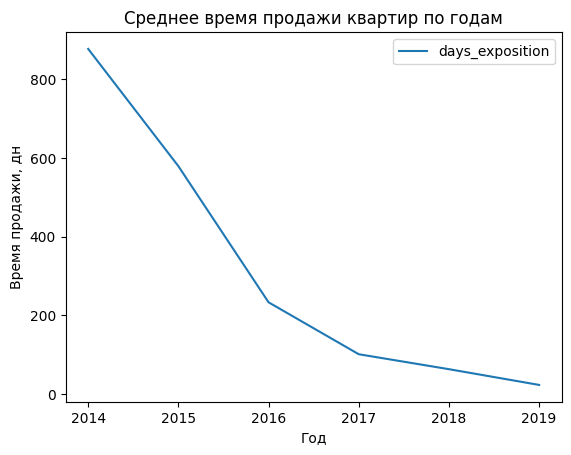

In [62]:
data.pivot_table(index='year_publication', values='days_exposition', aggfunc='median').plot()
plt.title('Среднее время продажи квартир по годам')
plt.xlabel('Год')
plt.ylabel('Время продажи, дн')
plt.show()

За годы работы сервиса среднее время продажи квартиры сильно сократилось - с 877 дней до 23! Сокращение было последовательным , каждый год время постепенно убывало. 

**Вывод:**

В ходе анализа основных параметров объектов, наша исходная выборка была уменьшена за счет сокращения строк с аномальными значениями: слишком высокими и низкими потолками, со слишком большой этажностью, со слишком маленькой жилой площадью. Кроме того, из массива были исключены данные о квартирах со слишком большой общей и жилой площадью, со слишком большой площадью кухни и с экстремально высокой и низкой ценой.

Также было выяснено, что стандартное время продажи квартиры в целом по выборке составляет приблизительно 93 дня. Однако этот параметр сильно изменялся от года к году: с 2014 по 2019 год время продажи квартиры сократилось в 38 раз. Это может быть связано с ростом популярности сервиса. 

Перед выполнением следующего шага, проверим, какой процент данных был потерян в ходе обработки пропусков и аномальных значений. Вызовем метод shape для отфильтрованной таблицы, чтобы посмотреть итоговое количество строк

In [63]:
data.shape

(22244, 32)

Заново считаем исходный файл и посмотрим, сколько строк было изначально

In [64]:
data_first = pd.read_csv('real_estate_data.csv', sep='\t') 
data_first.shape

(23699, 22)

In [65]:
# Посчитаем, какая доля значений была удалена
(data_first.shape[0] - data.shape[0]) / data_first.shape[0]

0.06139499556943331

Из исходного массива данных в ходе преобразований было удалено 6% от общего объема.

#### 3.2 Влиянение разных величин на общую стоимость объекта

Следующий шаг нашего исследования - определить как и какие факторы влияют на формирование общей стоимости объекта.

##### Общая площадь

Начнем с **общей площади** квартиры. Построим график зависимости стоимости от этого параметра:

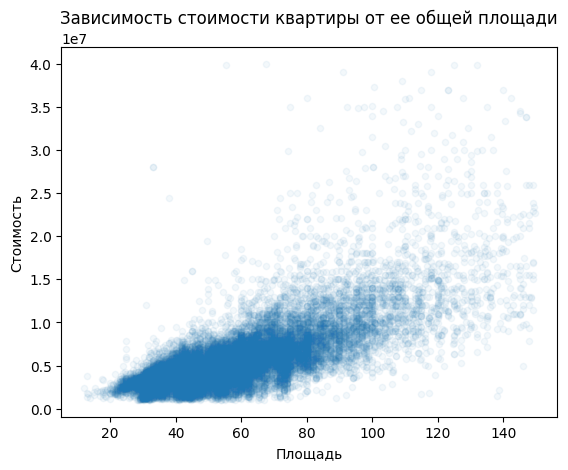

In [66]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05)
plt.title('Зависимость стоимости квартиры от ее общей площади')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

По графику наблюдается явная тенденция увеличения стоимости вместе с увеличением площади квартиры. Звучит логично. Посчитаем дополнительно коэффициент корреляции для этих значений:

In [67]:
data['total_area'].corr(data['last_price'])

0.735755023548207

Наше суждение подтвердилось. Корреляция между общей площадью квартиры и стоимостью жилья положительная - связь имеется, при том достаточно сильная, и с увеличением одной величины, растет другая.

##### Жилая площадь

Другой важный фактор **жилая площадь** объекта.

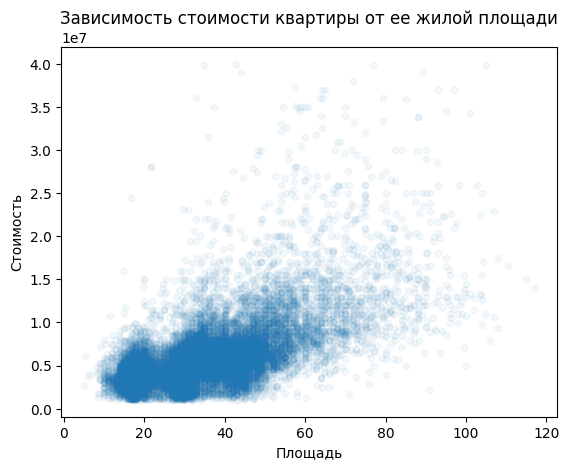

In [68]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05) # построим график зависимости стоимости
# квартиры от ее жилой площади
plt.title('Зависимость стоимости квартиры от ее жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

Судя по диаграмме рассеяния, связь между стоимостью квартиры и ее жилой площадью имеется, но она слабже, чем связь с общей площадью жилья. Проверим это, рассчитав коэффициент корреляция для этих величин:

In [69]:
data['living_area'].corr(data['last_price'])

0.6380471670062985

Действительно, связь есть, но чуть слабее, чем от общей площади.

##### Площадь кухни

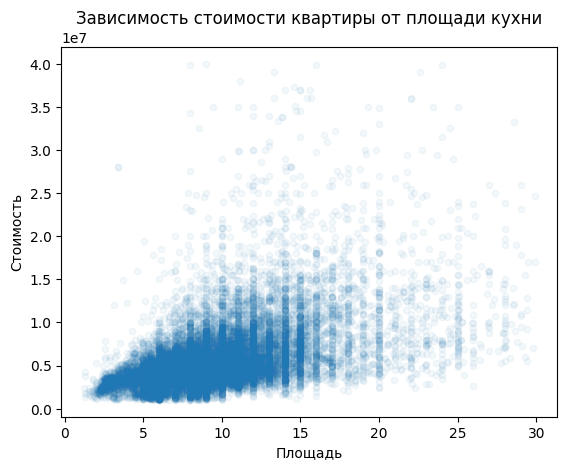

In [70]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.05) # построим график зависимости стоимости
# квартиры от площади кухни
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

По данной диаграмме больше заметно, как может отличаться стоимость жилья для одинаковых значений параметра "площадь кухни" (изображение "рябит" полосками из точек графика). 

In [71]:
data['kitchen_area'].corr(data['last_price'])

0.51996992624443

Коэффициент корреляции положительный. Связь между размерами кухни и стоимостью жилья есть, но она оказалась еще слабже, чем связь с вышеуказанными факторами. 

##### Количество комнат

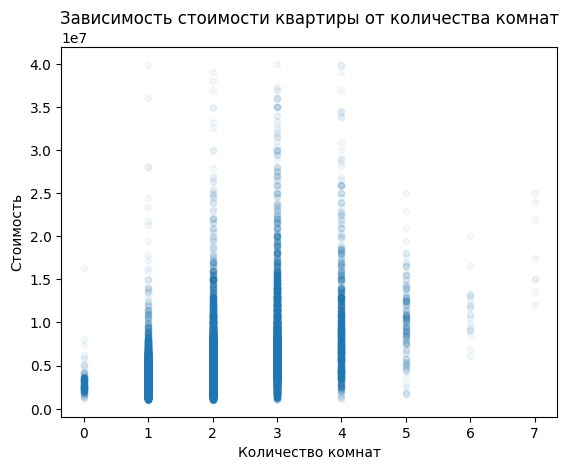

In [72]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05) # построим график зависимости стоимости
# квартиры от количества комнат в квартире
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()

Так как "видов" комнат у нас мало - всего семь, а квартир несоизмеримо много, по получившемуся графику сложно понять, есть ли между стоимостью квартиры и количеством комнат какая-то связь. Попробуем сначала сгруппировать квартиры по количеству комнат и уже по средним стоимостям в группах построим график зависимости. 

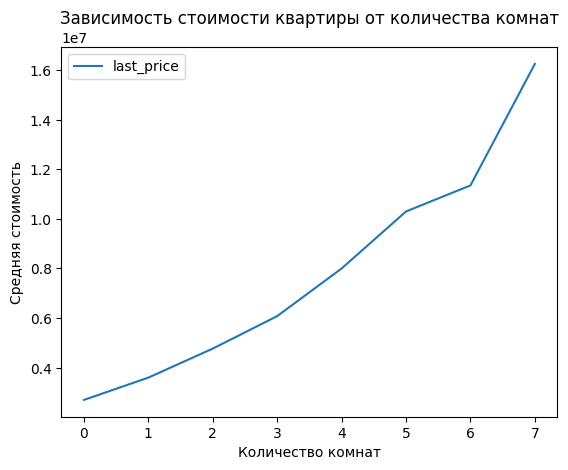

In [73]:
df_rooms_inf = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
df_rooms_inf.plot()
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость')
plt.show()

Теперь взаимосвязь налицо! Чем больше количество комнат, тем выше стоимость. 

In [74]:
data['rooms'].corr(data['last_price']) # посчитаем коэффициент корреляции Пирсона для количества комнат
# и стоимости квартиры

0.4471997791749196

О том же говорит коэффициент корреляции - он положителен.

##### Тип этажа

Так как типов этажей всего три, аналогично предыдущему сгруппируем данные и построим график по средним стоимостям в группах этажей:

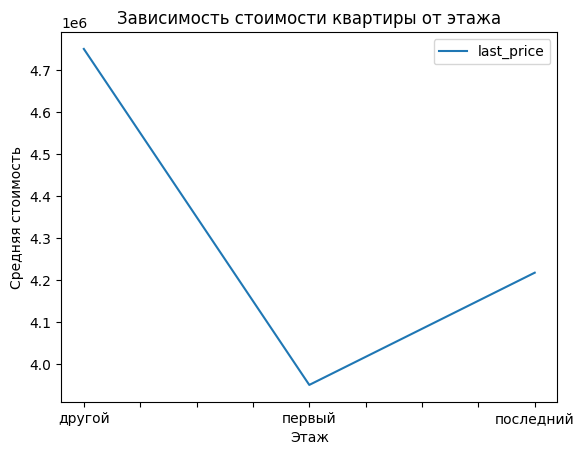

In [75]:
df_floor_inf = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
df_floor_inf.plot()
plt.title('Зависимость стоимости квартиры от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя стоимость')
plt.show()

По графику видно, что связь между величинами точно есть - средняя стоимость квартир на разных типах этажа очень сильно различается. Самая низкая средняя стоимость у квартир на первом этаже. Чуть дороже будет стоить квартира на последнем этаже. Самая высокая средняя стоимость у квартир на других этажах.

##### День недели публикации объявления

Дней недели у нас также небольшое количество - всего 7. Сразу сгруппируем по ним данные и построим график зависимости средней стоимости от дня неделя размещения объявления о продаже.

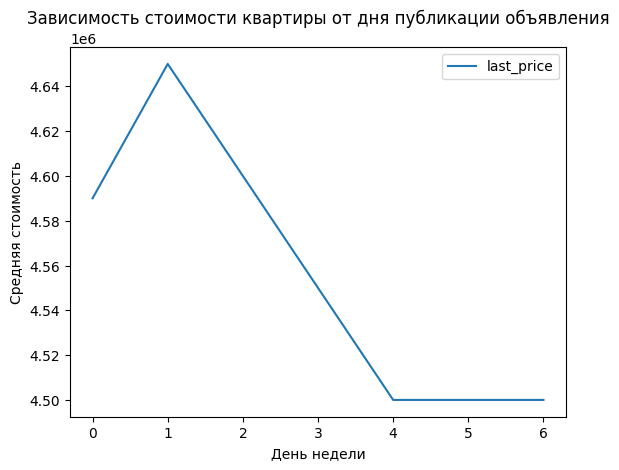

In [76]:
df_day_inf = data.pivot_table(index='day_publication', values='last_price', aggfunc='median')
df_day_inf.plot()
plt.title('Зависимость стоимости квартиры от дня публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость')
plt.show()

По графику видно, что более дорогие квартиры размещались обычно на сайте во вторник. Объявление о самых дешевых квартирах появлялись на сайте со среды по воскресенье. 

##### Месяц публикации объявления

Построим такие же графики для определения влияния месяца и года размещения объявления на стоимость квартиры.

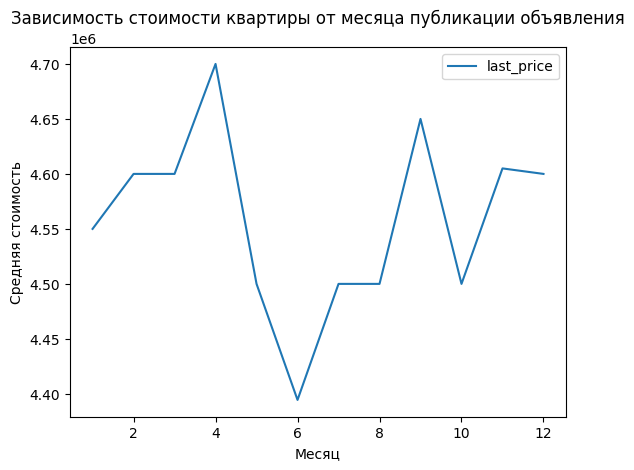

In [77]:
df_month_inf = data.pivot_table(index='month_publication', values='last_price', aggfunc='median')
df_month_inf.plot()
plt.title('Зависимость стоимости квартиры от месяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость')
plt.show()

Самыми дорогими на сайте являются квартиры, обявления о продаже которых были выложены апреле. Немного уступают квартиры появившиеся в базе в сентябре и с ноября по декабрь. Дешевле всего можно было приобрести квартиру, объявление о продаже которой было размещено в июне. 

##### Год публикации объявления

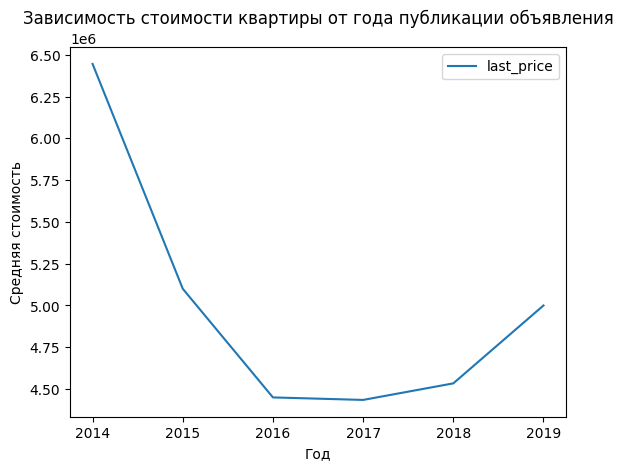

In [78]:
df_year_inf = data.pivot_table(index='year_publication', values='last_price', aggfunc='median')
df_year_inf.plot()
plt.title('Зависимость стоимости квартиры от года публикации объявления')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость')
plt.show()

В 2014 году квартиры заметно дороже, чем в период с 2015 по 2018 годы. В 2018 году средняя стоимость вновь начала расти.

Выясним в чем дело, проанализировав также изменение цены за квадратный метр и количества объявлений. Построим соответствующие графики, сгруппировав данные по годам. 

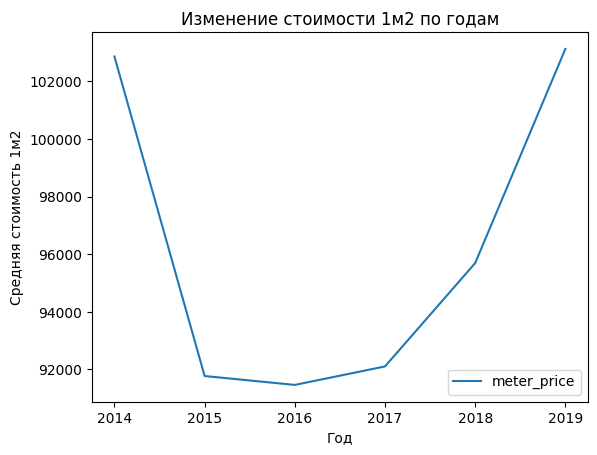

In [79]:
data.pivot_table(index='year_publication', values='meter_price', aggfunc='median').plot()
plt.title('Изменение стоимости 1м2 по годам')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость 1м2')
plt.show()

В 2015 году средняя цена за квадратный метр также сильно упала как и средняя общая стоимость, однако вновь расти она, пусть и постепенно, начала уже в 2016 году. В 2018 году цена за квадратный метр резко пошла вверх и в 2019 году превысила результат 2014 года.

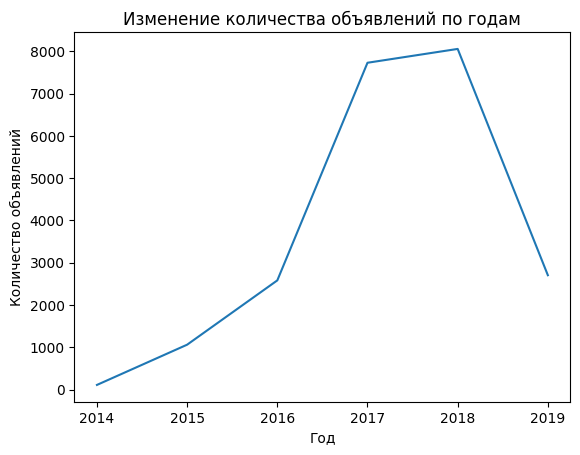

In [80]:
data.pivot_table(index='year_publication', values='meter_price', aggfunc='count').plot(legend=False)
plt.title('Изменение количества объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Количество объявлений')
plt.show()

А вот количество объявлений наоборот стало резко падать именно в 2018 году.

Таким образом, изменение количества объявлений смазало картину по средней стоимости. Отсюда можно сделать вывод, что при анализе лучше ориентироваться на стоимость квадратного метра. 

**Вывод:**

Общая и жилая площади, а также площадь кухни напрямую влияют на стоимость квартиры - чем больше тот или иной показатель площади, тем выше стоимость объекта. То же самое можно сказать о количестве комнат. Так как жилая площадь, площадь кухни количество комнат в той или иной степени зависят от общей площади, можно сделать вывод, что главным фактором определяющим стоимость квартиры является именно общая площадь. Об этом же говорит коэффициент корреляции для этого параметра и общей стоимости жилья.

Тип этажа на стоимость влияет следующих образом: самые дешевые квартиры расположены на первом этаже, чуть дороже квартиры на последнем этаже, самая высокая средняя стоимость у квартир на других этажах.

Объявления о самых дорогих квартирах появлялись на сайте в начале недели. Самые дешевые в середине недели. Средняя стоимость с середины до конца недели была неизменна.

Также дорого стоили квартиры, обявления о продаже которых были выложены в середине весны. Дешевле всего можно было приобрести квартиру, объявление о продаже которой было размещено в начале лета. 

В 2014 году средняя стоимость жилья в Санкт-Петербурге и Ленинградской области была значительно выше, чем в период с 2015-2016 годы. Самая низкая стоимость также наблюдалась в период с 2015 по 2016 год. В 2016 году начался постепенный рост стоимости. В 2019 году цены превысили уровень 2014 года.

#### Цена за квадратный метр в разных населенных пунктах

Исследуем цену за 1 квадратный метр в 10 населенных пунктах с самым большим количеством объявлений. 

In [81]:
cities = data['new_locality_name'].value_counts().head(10).index # определим список 10 населенных пунктов 
# с самым большим количеством объявлений

In [82]:
data.pivot_table(index='new_locality_name', values='meter_price', aggfunc='median').loc[cities]\
.sort_values(by='meter_price', ascending=False) # выведем сводную таблицу со средней ценой за квадратный метр
# в разных городах

,meter_price
new_locality_name,
Санкт-Петербург,103921.568627
Пушкин,99596.341873
Кудрово,95555.311677
Парголово,91780.224134
Мурино,86075.949367
Шушары,76876.172608
Колпино,74725.274725
Гатчина,67671.510409
Всеволожск,65737.874097


Для наглядности построим график по данной этой сводной таблицы.

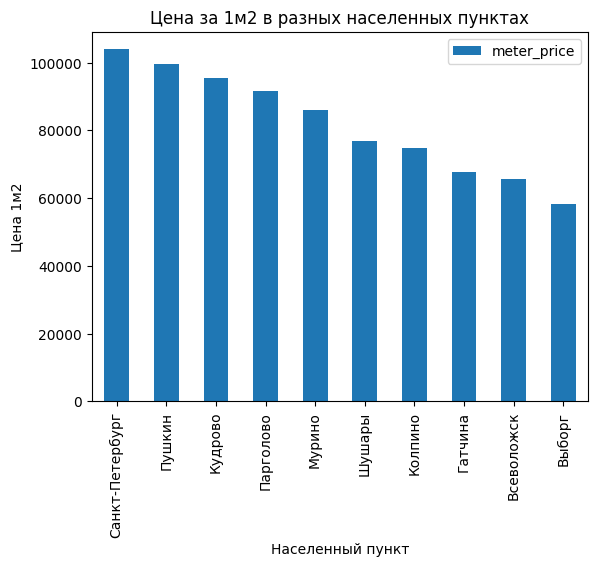

In [83]:
data.pivot_table(index='new_locality_name', values='meter_price', aggfunc='median').loc[cities]\
.sort_values(by='meter_price', ascending=False).plot(kind='bar')
plt.title('Цена за 1м2 в разных населенных пунктах')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена 1м2')
plt.show()

**Вывод:**

Разумеется, самым дорогим оказалось в Санкт-Петербурге. В то же время не сильно от регионального центра отстает город Пушкин. Самые дешевые квартиры оказались в Выборге - средняя стоимость одного квадратного метра почти вдвое меньше, чем в Санкт-Петербурге.

#### Взаимосвязь стоимости жилья и удаленности от центра в Санкт-Петербурге

Посмотрим, как влияет удаленность от центра на стоимость квартир в Санкт-Петербурге.

In [84]:
distance_spb = data.query('new_locality_name=="Санкт-Петербург"')\
.pivot_table(index='city_nearest', values='last_price', aggfunc='median') # из общего массива найдем квартиры
# в Санкт-Петербурге и сгрпуппируем данные о них по их удаленности от центра в километрах

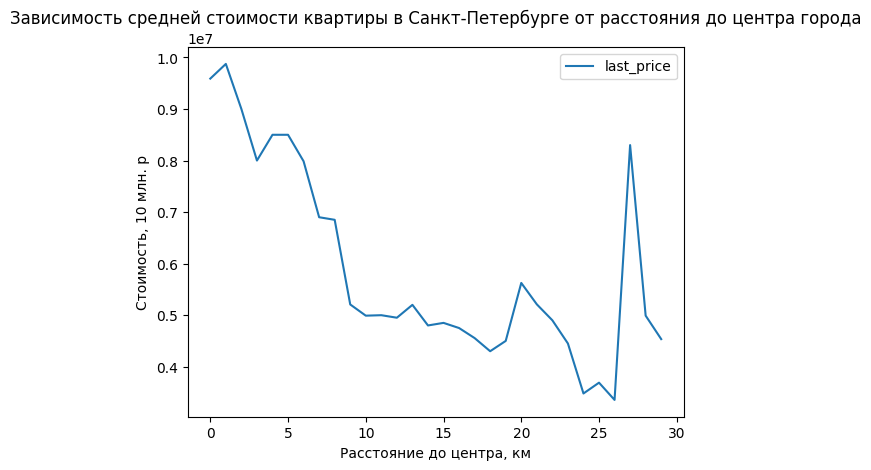

In [85]:
distance_spb.plot()
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость, 10 млн. р') # построим график зависимости средней общей стоимости квартиры в Санкт-Петербурге
# от расстояния до центра города в километрах
plt.title('Зависимость средней стоимости квартиры в Санкт-Петербурге от расстояния до центра города')
plt.show()

**Вывод:**

Наблюдается обратная зависимость стоимости жилья от расстояния до центра Санкт-Петербурга - чем больше расстояние, тем квартиры дешевле. Самые дорогие квартиры находятся в пределах приблизительно 5 километров от центра. Самые дешевые - в районе 25 километров. 

На графике наблюдается всплекс на расстоянии свыше 25 километров. В этом районе стоимость жилья резко возрастает. Так как элитное жилье мы постарались отсеить, а для анализа взяли медианную стоимость, такая аномалия может быть вызвана тем, что на этом участке в нашей выборке представлено небольшое количество квартир с большой стоимостью (с большой площадью и количеством квартир и т.д).

### 4. Общий вывод

В ходе исследования объявлений о продаже квартир мы работали с таблицой с данными с сервиса Яндекс Недвижимость. В представленном массиве хранились данные о жилье, выставленным на продажу в Санкт-Петербурге и Ленинградской области в период с 2014 по 2019 год.

В ходе предобработки исходных данных были выявлены следующие проблемы:
- отсутствие большого объема данных (так, например в столбце **is_apartment** отсутствовало около 88% значений);
- некорректный тип данных;
- наличие неявных дубликатов.

Большинство отсутствующих значений было заполнено. Некоторые столбцы остались без изменений с целью не исказить результат исследований.

Типы данных были преобразованы в соответствии с видом информации, представленной в каждом столбце.

Неявные дубликаты в названии населенных пунктов были исключены путем разбиения столбца с наименованием на два отдельных столбца: с типом населенного пункта и его именем.

В процессе анализа основных параметров объектов, представленных в таблице, были выявлены аномальные значения: слишком высокие и низкие потолки, слишком большая этажность, слишком маленькая жилая площадь. Строки с такими явлениями были удалены. Кроме того, из массива были исключены данные о квартирах со слишком большой общей и жилой площадью, со слишком большой площадью кухни и с экстремально высокой ценой, чтобы исключить из анализа элитное жилье.

Дальнейший анализ показал, что типичное время продажи квартиры на сервисе составляет около 93 дней. Хотя в целом время продажи может сильно колебаться: от 44 до 1580 дней.

Главной задачей нашего исследования было выявить параметры , которые сильнее всего влияют на стоимость жилья. Так, было установлено, что наибольшее влияние на стоимость объекта имеет общая площадь. Кроме того, удалось определить, что самые дешевые квартиры расположены на первом этаже, чуть дороже квартиры на последнем этаже, самая высокая средняя стоимость у квартир на других этажах.

Что касается времени появления объявлений на сервисе, самые дорогие квартиры размещались на нем в начале недели. К середине недели стоимость размещаемых квартир падала и не менялась до конца недели.

Связь стоимости квартиры с сезонностью объявлений следующая: объявления с самыми дорогими квартирами выложены в середине весны, объявления с самыми дешевыми квартирами размещались в начале лета. 

В 2014 году средняя стоимость жилья в Санкт-Петербурге и Ленинградской области была значительно выше, чем в период с 2015-2016 годы. В 2016 году начался постепенный рост стоимости. В 2019 году цены превысили уровень 2014 года.

Анализ цены одного квадратного метра показал, что самое дорогое жилье располагается в Санкт-Петербурге. В то же время не сильно от регионального центра отстает город Пушкин. Самые дешевые квартиры оказались в Выборге - средняя стоимость одного квадратного метра почти вдвое меньше, чем в Санкт-Петербурге.

Для квартир в Санкт-Петербурге был определен другой важный критерий формирования стоимости - удаленность от центра. Чем дальше больше жилье удалено от цетра, тем ниже его стоимость. Таким образом самые дорогие квартиры в Санкт-Петербурге удалены от центра не больше, чем на пару километров.